In [6]:
import numpy as np
from six.moves import cPickle as pickle
from six.moves import range
import os
import h5py
import matplotlib.pyplot as plt
from PIL import Image
import random

#necessary imports

In [7]:
#path to folders with images: http://ufldl.stanford.edu/housenumbers
train_folders = 'D:/magistratura/magistratura/MO/lab4/train/digitStruct.mat'
test_folders = 'D:/magistratura/magistratura/MO/lab4/test/digitStruct.mat'
extra_folders = 'D:/magistratura/magistratura/MO/lab4/extra/digitStruct.mat'

In [8]:
#open files with images
train_dataset = h5py.File(train_folders, "r")
test_dataset = h5py.File(test_folders, "r")
extra_dataset = h5py.File(extra_folders, "r")

In [9]:
#struct for storing dataset
inf = train_dataset

#struct with images names
digitStructName = inf['digitStruct']['name']

#struct with digit bboxes in images  
digitStructBbox = inf['digitStruct']['bbox']

#array for storing bboxes
pictDat = [0] * len(digitStructName)

#storing all digits bboxes part
for i in range(len(digitStructName)):
    if i % 1000 == 0:
        print(i)
    bbox = {}
    bb = digitStructBbox[i].item()
    
    attr = 0
    
    #storing all bboxes heights in image (one or several bboxes in one image)
    if (len(inf[bb]["height"]) > 1):
        attr = [inf[inf[bb]["height"].value[j].item()].value[0][0] for j in range(len(inf[bb]["height"]))]
    else:
        attr = [inf[bb]["height"].value[0][0]]
    
    bbox['height'] = attr
    
    #storing all labels in image (one or several labels in one image)
    if (len(inf[bb]["label"]) > 1):
        attr = [inf[inf[bb]["label"].value[j].item()].value[0][0] for j in range(len(inf[bb]["label"]))]
    else:
        attr = [inf[bb]["label"].value[0][0]]
    
    bbox['label'] = attr
    
    #storing all bboxes left borders in image (one or several bboxes in one image)
    if (len(inf[bb]["left"]) > 1):
        attr = [inf[inf[bb]["left"].value[j].item()].value[0][0] for j in range(len(inf[bb]["left"]))]
    else:
        attr = [inf[bb]["left"].value[0][0]]
    
    bbox['left'] = attr
    
    #storing all bboxes top borders in image (one or several bboxes in one image)
    if (len(inf[bb]["top"]) > 1):
        attr = [inf[inf[bb]["top"].value[j].item()].value[0][0] for j in range(len(inf[bb]["top"]))]
    else:
        attr = [inf[bb]["top"].value[0][0]]
    
    bbox['top'] = attr
    
    #storing all bboxes widthes  in image (one or several bboxes in one image)
    if (len(inf[bb]["width"]) > 1):
        attr = [inf[inf[bb]["width"].value[j].item()].value[0][0] for j in range(len(inf[bb]["width"]))]
    else:
        attr = [inf[bb]["width"].value[0][0]]
    
    bbox['width'] = attr
    
    #storing image filename as string
    bbox['name'] = ''.join([chr(c[0]) for c in inf[digitStructName[i][0]].value])
    
    #saving bbox information item in pictDat array
    pictDat[i] = bbox

    
#restruct data and storing it like array of dicts with filename and array of bboxes information    
result = []
structCnt = 1
for i in range(len(pictDat)):
    if i % 1000 == 0:
        print("getAllDigitStructure_ByDigit iteration: " + str(i) + " from: " + str(len(pictDat)) + "\n", end=' ',flush=True)
    item = {'filename': pictDat[i]["name"]}
    figures = []
    for j in range(len(pictDat[i]['height'])):
        figure = {}
        figure['height'] = pictDat[i]['height'][j]
        figure['label'] = pictDat[i]['label'][j]
        figure['left'] = pictDat[i]['left'][j]
        figure['top'] = pictDat[i]['top'][j]
        figure['width'] = pictDat[i]['width'][j]
        figures.append(figure)
    structCnt = structCnt + 1
    item['boxes'] = figures
    result.append(item)
    
train_data = result

0


<ipython-input-9-d3881b92ce5d>:16: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  attr = [inf[inf[bb]["height"].value[j].item()].value[0][0] for j in range(len(inf[bb]["height"]))]
<ipython-input-9-d3881b92ce5d>:24: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  attr = [inf[inf[bb]["label"].value[j].item()].value[0][0] for j in range(len(inf[bb]["label"]))]
<ipython-input-9-d3881b92ce5d>:32: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  attr = [inf[inf[bb]["left"].value[j].item()].value[0][0] for j in range(len(inf[bb]["left"]))]
<ipython-input-9-d3881b92ce5d>:40: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  attr = [inf[inf[bb]["top"].value[j].item()].value[0][0] for j in range(len(inf[bb]["top"]))]
<ipython-input-9-d3881b92ce5d>:48: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  attr = [inf

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
getAllDigitStructure_ByDigit iteration: 0 from: 33402
 getAllDigitStructure_ByDigit iteration: 1000 from: 33402
 getAllDigitStructure_ByDigit iteration: 2000 from: 33402
 getAllDigitStructure_ByDigit iteration: 3000 from: 33402
 getAllDigitStructure_ByDigit iteration: 4000 from: 33402
 getAllDigitStructure_ByDigit iteration: 5000 from: 33402
 getAllDigitStructure_ByDigit iteration: 6000 from: 33402
 getAllDigitStructure_ByDigit iteration: 7000 from: 33402
 getAllDigitStructure_ByDigit iteration: 8000 from: 33402
 getAllDigitStructure_ByDigit iteration: 9000 from: 33402
 getAllDigitStructure_ByDigit iteration: 10000 from: 33402
 getAllDigitStructure_ByDigit iteration: 11000 from: 33402
 getAllDigitStructure_ByDigit iteration: 12000 from: 33402
 getAllDigitStructure_ByDigit iteration: 13000 from: 33402

In [10]:
#struct for storing dataset
inf = test_dataset

#struct with images names
digitStructName = inf['digitStruct']['name']

#struct with digit bboxes in images
digitStructBbox = inf['digitStruct']['bbox']

#array for storing bboxes
pictDat = [0] * len(digitStructName)

#storing all digits bboxes part
for i in range(len(digitStructName)):
    if i % 1000 == 0:
        print(i)
    bbox = {}
    bb = digitStructBbox[i].item()
    
    attr = 0
    
    #storing all bboxes heights in image (one or several bboxes in one image)
    if (len(inf[bb]["height"]) > 1):
        attr = [inf[inf[bb]["height"].value[j].item()].value[0][0] for j in range(len(inf[bb]["height"]))]
    else:
        attr = [inf[bb]["height"].value[0][0]]
    
    bbox['height'] = attr
    
    #storing all labels in image (one or several labels in one image)
    if (len(inf[bb]["label"]) > 1):
        attr = [inf[inf[bb]["label"].value[j].item()].value[0][0] for j in range(len(inf[bb]["label"]))]
    else:
        attr = [inf[bb]["label"].value[0][0]]
    
    bbox['label'] = attr
    
    #storing all bboxes left borders in image (one or several bboxes in one image)
    if (len(inf[bb]["left"]) > 1):
        attr = [inf[inf[bb]["left"].value[j].item()].value[0][0] for j in range(len(inf[bb]["left"]))]
    else:
        attr = [inf[bb]["left"].value[0][0]]
    
    bbox['left'] = attr
    
    #storing all bboxes top borders in image (one or several bboxes in one image)
    if (len(inf[bb]["top"]) > 1):
        attr = [inf[inf[bb]["top"].value[j].item()].value[0][0] for j in range(len(inf[bb]["top"]))]
    else:
        attr = [inf[bb]["top"].value[0][0]]
    
    bbox['top'] = attr
    
    #storing all bboxes widthes  in image (one or several bboxes in one image)
    if (len(inf[bb]["width"]) > 1):
        attr = [inf[inf[bb]["width"].value[j].item()].value[0][0] for j in range(len(inf[bb]["width"]))]
    else:
        attr = [inf[bb]["width"].value[0][0]]
    
    bbox['width'] = attr
    
    #storing image filename as string
    bbox['name'] = ''.join([chr(c[0]) for c in inf[digitStructName[i][0]].value])
    
    #saving bbox information item in pictDat array
    pictDat[i] = bbox

#restruct data and storing it like array of dicts with filename and array of bboxes information 
result = []
structCnt = 1
for i in range(len(pictDat)):
    if i % 1000 == 0:
        print("getAllDigitStructure_ByDigit iteration: " + str(i) + " from: " + str(len(pictDat)) + "\n", end=' ',flush=True)
    item = {'filename': pictDat[i]["name"]}
    figures = []
    for j in range(len(pictDat[i]['height'])):
        figure = {}
        figure['height'] = pictDat[i]['height'][j]
        figure['label'] = pictDat[i]['label'][j]
        figure['left'] = pictDat[i]['left'][j]
        figure['top'] = pictDat[i]['top'][j]
        figure['width'] = pictDat[i]['width'][j]
        figures.append(figure)
    structCnt = structCnt + 1
    item['boxes'] = figures
    result.append(item)

test_data = result

0


<ipython-input-10-e6701261e2e7>:18: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  attr = [inf[bb]["height"].value[0][0]]
<ipython-input-10-e6701261e2e7>:26: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  attr = [inf[bb]["label"].value[0][0]]
<ipython-input-10-e6701261e2e7>:34: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  attr = [inf[bb]["left"].value[0][0]]
<ipython-input-10-e6701261e2e7>:42: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  attr = [inf[bb]["top"].value[0][0]]
<ipython-input-10-e6701261e2e7>:50: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  attr = [inf[bb]["width"].value[0][0]]
<ipython-input-10-e6701261e2e7>:54: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  bbox['name'] = ''.join([chr(c[0]) for c in inf[digitStructName[i][0]].value])
<i

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
getAllDigitStructure_ByDigit iteration: 0 from: 13068
 getAllDigitStructure_ByDigit iteration: 1000 from: 13068
 getAllDigitStructure_ByDigit iteration: 2000 from: 13068
 getAllDigitStructure_ByDigit iteration: 3000 from: 13068
 getAllDigitStructure_ByDigit iteration: 4000 from: 13068
 getAllDigitStructure_ByDigit iteration: 5000 from: 13068
 getAllDigitStructure_ByDigit iteration: 6000 from: 13068
 getAllDigitStructure_ByDigit iteration: 7000 from: 13068
 getAllDigitStructure_ByDigit iteration: 8000 from: 13068
 getAllDigitStructure_ByDigit iteration: 9000 from: 13068
 getAllDigitStructure_ByDigit iteration: 10000 from: 13068
 getAllDigitStructure_ByDigit iteration: 11000 from: 13068
 getAllDigitStructure_ByDigit iteration: 12000 from: 13068
 getAllDigitStructure_ByDigit iteration: 13000 from: 13068
 

In [11]:
#struct for storing dataset
inf = extra_dataset

#struct with images names
digitStructName = inf['digitStruct']['name']

#struct with digit bboxes in images
digitStructBbox = inf['digitStruct']['bbox']

#array for storing bboxes
pictDat = [0] * len(digitStructName)

#storing all digits bboxes part
for i in range(len(digitStructName)):
    if i % 1000 == 0:
        print(i)
    bbox = {}
    bb = digitStructBbox[i].item()
    
    attr = 0
    
    #storing all bboxes heights in image (one or several bboxes in one image)
    if (len(inf[bb]["height"]) > 1):
        attr = [inf[inf[bb]["height"].value[j].item()].value[0][0] for j in range(len(inf[bb]["height"]))]
    else:
        attr = [inf[bb]["height"].value[0][0]]
    
    bbox['height'] = attr
    
    #storing all labels in image (one or several labels in one image)
    if (len(inf[bb]["label"]) > 1):
        attr = [inf[inf[bb]["label"].value[j].item()].value[0][0] for j in range(len(inf[bb]["label"]))]
    else:
        attr = [inf[bb]["label"].value[0][0]]
    
    bbox['label'] = attr
    
    #storing all bboxes left borders in image (one or several bboxes in one image)
    if (len(inf[bb]["left"]) > 1):
        attr = [inf[inf[bb]["left"].value[j].item()].value[0][0] for j in range(len(inf[bb]["left"]))]
    else:
        attr = [inf[bb]["left"].value[0][0]]
    
    bbox['left'] = attr
    
    #storing all bboxes top borders in image (one or several bboxes in one image)
    if (len(inf[bb]["top"]) > 1):
        attr = [inf[inf[bb]["top"].value[j].item()].value[0][0] for j in range(len(inf[bb]["top"]))]
    else:
        attr = [inf[bb]["top"].value[0][0]]
    
    bbox['top'] = attr
    
    #storing all bboxes widthes  in image (one or several bboxes in one image)
    if (len(inf[bb]["width"]) > 1):
        attr = [inf[inf[bb]["width"].value[j].item()].value[0][0] for j in range(len(inf[bb]["width"]))]
    else:
        attr = [inf[bb]["width"].value[0][0]]
    
    bbox['width'] = attr
    
    #storing image filename as string
    bbox['name'] = ''.join([chr(c[0]) for c in inf[digitStructName[i][0]].value])
    
    #saving bbox information item in pictDat array
    pictDat[i] = bbox

#restruct data and storing it like array of dicts with filename and array of bboxes information 
result = []
structCnt = 1
for i in range(len(pictDat)):
    if i % 1000 == 0:
        print("getAllDigitStructure_ByDigit iteration: " + str(i) + " from: " + str(len(pictDat)) + "\n", end=' ',flush=True)
    item = {'filename': pictDat[i]["name"]}
    figures = []
    for j in range(len(pictDat[i]['height'])):
        figure = {}
        figure['height'] = pictDat[i]['height'][j]
        figure['label'] = pictDat[i]['label'][j]
        figure['left'] = pictDat[i]['left'][j]
        figure['top'] = pictDat[i]['top'][j]
        figure['width'] = pictDat[i]['width'][j]
        figures.append(figure)
    structCnt = structCnt + 1
    item['boxes'] = figures
    result.append(item)

extra_data = result

0


<ipython-input-11-fcb35a13c36f>:16: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  attr = [inf[inf[bb]["height"].value[j].item()].value[0][0] for j in range(len(inf[bb]["height"]))]
<ipython-input-11-fcb35a13c36f>:24: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  attr = [inf[inf[bb]["label"].value[j].item()].value[0][0] for j in range(len(inf[bb]["label"]))]
<ipython-input-11-fcb35a13c36f>:32: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  attr = [inf[inf[bb]["left"].value[j].item()].value[0][0] for j in range(len(inf[bb]["left"]))]
<ipython-input-11-fcb35a13c36f>:40: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  attr = [inf[inf[bb]["top"].value[j].item()].value[0][0] for j in range(len(inf[bb]["top"]))]
<ipython-input-11-fcb35a13c36f>:48: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  attr =

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
15

 getAllDigitStructure_ByDigit iteration: 115000 from: 202353
 getAllDigitStructure_ByDigit iteration: 116000 from: 202353
 getAllDigitStructure_ByDigit iteration: 117000 from: 202353
 getAllDigitStructure_ByDigit iteration: 118000 from: 202353
 getAllDigitStructure_ByDigit iteration: 119000 from: 202353
 getAllDigitStructure_ByDigit iteration: 120000 from: 202353
 getAllDigitStructure_ByDigit iteration: 121000 from: 202353
 getAllDigitStructure_ByDigit iteration: 122000 from: 202353
 getAllDigitStructure_ByDigit iteration: 123000 from: 202353
 getAllDigitStructure_ByDigit iteration: 124000 from: 202353
 getAllDigitStructure_ByDigit iteration: 125000 from: 202353
 getAllDigitStructure_ByDigit iteration: 126000 from: 202353
 getAllDigitStructure_ByDigit iteration: 127000 from: 202353
 getAllDigitStructure_ByDigit iteration: 128000 from: 202353
 getAllDigitStructure_ByDigit iteration: 129000 from: 202353
 getAllDigitStructure_ByDigit iteration: 130000 from: 202353
 getAllDigitStructure_By

In [12]:
digitStruct = test_data
folder = 'D:/magistratura/magistratura/MO/lab4/test'

#dataset with images pixels information
dataset = np.ndarray(shape=(len(digitStruct), 32, 32), dtype='float32')

#dataset with images labels
labels = np.ones(shape=(len(digitStruct), 6), dtype='int') * 10

#crop digits from image and save 32*32 image information part
for i in range(len(digitStruct)):
    if i % 1000 == 0:
        print("getDataset iteration: " + str(i) + " from: " + str(len(digitStruct)) + "\n", end=' ', flush=True)
    
    #open image from file
    fin = os.path.join(folder, digitStruct[i]['filename'])
    im = Image.open(fin)

    boxes = digitStruct[i]['boxes']
    
    #scip image with more than 5 digits
    if len(boxes) > 5:
        print(fin, "has more than 5 digits")
    else:
        #save labels information
        #the first item is an amount of digits, other is digits (10 for 0)
        labels[i, 0] = len(boxes)
        labels[i, 1:len(boxes) + 1] = [int(j['label']) for j in boxes]
    
    #array with digits bboxes information
    left = [j['left'] for j in boxes]
    top = [j['top'] for j in boxes]
    height = [j['height'] for j in boxes]
    width = [j['width'] for j in boxes]
    
    #define left, top, width and height bbox information for the whole number based on digit bboxes
    im_left = min(left)
    im_top = min(top)
    im_height = max(top) + max(height) - im_top
    im_width = max(left) + max(width) - im_left
    
    #make number region a bit higher and a bit wider
    im_top = im_top - im_height * 0.05 
    im_left = im_left - im_width * 0.05 
    im_bottom = min(im.size[1], im_top + im_height * 1.05)
    im_right = min(im.size[0], im_left + im_width * 1.05)

    box = (im_left, im_top, im_right, im_bottom)

    size = (32, 32)
    
    #crop number region and resize to 32*32
    region = im.crop(box).resize(size)
    
    #convert to grayscale format
    im = np.dot(np.array(region, dtype='float32'), [0.299, 0.587, 0.114])
    
    pixel_depth=255.0
    
    #normalization
    region = (np.array(im, dtype='float32') - (pixel_depth / 2)) / (pixel_depth / 2)

    dataset[i, :, :] = region[:, :]

print('dataset:', dataset.shape)
print('labels:', labels.shape)

test_dataset = dataset
test_labels = labels

getDataset iteration: 0 from: 13068
 getDataset iteration: 1000 from: 13068
 getDataset iteration: 2000 from: 13068
 getDataset iteration: 3000 from: 13068
 getDataset iteration: 4000 from: 13068
 getDataset iteration: 5000 from: 13068
 getDataset iteration: 6000 from: 13068
 getDataset iteration: 7000 from: 13068
 getDataset iteration: 8000 from: 13068
 getDataset iteration: 9000 from: 13068
 getDataset iteration: 10000 from: 13068
 getDataset iteration: 11000 from: 13068
 getDataset iteration: 12000 from: 13068
 getDataset iteration: 13000 from: 13068
 dataset: (13068, 32, 32)
labels: (13068, 6)


In [13]:
digitStruct = train_data
folder = 'D:/magistratura/magistratura/MO/lab4/train'

#dataset with images pixels information
dataset = np.ndarray(shape=(len(digitStruct), 32, 32), dtype='float32')

#dataset with images labels
labels = np.ones(shape=(len(digitStruct), 6), dtype='int') * 10

#crop digits from image and save 32*32 image information part
for i in range(len(digitStruct)):
    if i % 1000 == 0:
        print("getDataset iteration: " + str(i) + " from: " + str(len(digitStruct)) + "\n", end=' ', flush=True)

    #open image from file
    fin = os.path.join(folder, digitStruct[i]['filename'])
    im = Image.open(fin)

    boxes = digitStruct[i]['boxes']
    
    #scip image with more than 5 digits
    if len(boxes) > 5:
        print(fin, "has more than 5 digits")
    else:
        #save labels information
        #the first item is an amount of digits, other is digits (10 for 0)
        labels[i, 0] = len(boxes)
        labels[i, 1:len(boxes) + 1] = [int(j['label']) for j in boxes]
    
    #array with digits bboxes information
    left = [j['left'] for j in boxes]
    top = [j['top'] for j in boxes]
    height = [j['height'] for j in boxes]
    width = [j['width'] for j in boxes]
    
    #define left, top, width and height bbox information for the whole number based on digit bboxes
    im_left = min(left)
    im_top = min(top)
    im_height = max(top) + max(height) - im_top
    im_width = max(left) + max(width) - im_left
    
    #make number region a bit higher and a bit wider
    im_top = im_top - im_height * 0.05  # a bit higher
    im_left = im_left - im_width * 0.05  # a bit wider
    im_bottom = min(im.size[1], im_top + im_height * 1.05)
    im_right = min(im.size[0], im_left + im_width * 1.05)

    box = (im_left, im_top, im_right, im_bottom)

    size = (32, 32)
    
    #crop number region and resize to 32*32
    region = im.crop(box).resize(size)
    
    
    #convert to grayscale format
    im = np.dot(np.array(region, dtype='float32'), [0.299, 0.587, 0.114])
    
    pixel_depth=255.0

    #normalization
    region = (np.array(im, dtype='float32') - (pixel_depth / 2)) / (pixel_depth / 2)

    dataset[i, :, :] = region[:, :]

print('dataset:', dataset.shape)
print('labels:', labels.shape)

train_dataset = dataset
train_labels = labels

getDataset iteration: 0 from: 33402
 getDataset iteration: 1000 from: 33402
 getDataset iteration: 2000 from: 33402
 getDataset iteration: 3000 from: 33402
 getDataset iteration: 4000 from: 33402
 getDataset iteration: 5000 from: 33402
 getDataset iteration: 6000 from: 33402
 getDataset iteration: 7000 from: 33402
 getDataset iteration: 8000 from: 33402
 getDataset iteration: 9000 from: 33402
 getDataset iteration: 10000 from: 33402
 getDataset iteration: 11000 from: 33402
 getDataset iteration: 12000 from: 33402
 getDataset iteration: 13000 from: 33402
 getDataset iteration: 14000 from: 33402
 getDataset iteration: 15000 from: 33402
 getDataset iteration: 16000 from: 33402
 getDataset iteration: 17000 from: 33402
 getDataset iteration: 18000 from: 33402
 getDataset iteration: 19000 from: 33402
 getDataset iteration: 20000 from: 33402
 getDataset iteration: 21000 from: 33402
 getDataset iteration: 22000 from: 33402
 getDataset iteration: 23000 from: 33402
 getDataset iteration: 24000 f

In [21]:
digitStruct = extra_data
folder = 'D:/magistratura/magistratura/MO/lab4/extra'

#dataset with images pixels information
dataset = np.ndarray(shape=(len(digitStruct), 32, 32), dtype='float32')

#dataset with images labels
labels = np.ones(shape=(len(digitStruct), 6), dtype='int') * 10

#crop digits from image and save 32*32 image information part
for i in range(len(digitStruct)):
    if i % 1000 == 0:
        print("getDataset iteration: " + str(i) + " from: " + str(len(digitStruct)) + "\n", end=' ', flush=True)
    
    #open image from file
    fin = os.path.join(folder, digitStruct[i]['filename'])
    im = Image.open(fin)

    boxes = digitStruct[i]['boxes']
    
    #scip image with more than 5 digits
    if len(boxes) > 5:
        print(fin, "has more than 5 digits")
    else:
        #save labels information
        #the first item is an amount of digits, other is digits (10 for 0)
        labels[i, 0] = len(boxes)
        labels[i, 1:len(boxes) + 1] = [int(j['label']) for j in boxes]

    #array with digits bboxes information
    left = [j['left'] for j in boxes]
    top = [j['top'] for j in boxes]
    height = [j['height'] for j in boxes]
    width = [j['width'] for j in boxes]
    
    #define left, top, width and height bbox information for the whole number based on digit bboxes
    im_left = min(left)
    im_top = min(top)
    im_height = max(top) + max(height) - im_top
    im_width = max(left) + max(width) - im_left

    #make number region a bit higher and a bit wider
    im_top = im_top - im_height * 0.05  # a bit higher
    im_left = im_left - im_width * 0.05  # a bit wider
    im_bottom = min(im.size[1], im_top + im_height * 1.05)
    im_right = min(im.size[0], im_left + im_width * 1.05)

    box = (im_left, im_top, im_right, im_bottom)

    size = (32, 32)
    
    #crop number region and resize to 32*32
    region = im.crop(box).resize(size)
    
    #convert to grayscale format
    im = np.dot(np.array(region, dtype='float32'), [0.299, 0.587, 0.114])
    
    pixel_depth=255.0
    
    #normalization
    region = (np.array(im, dtype='float32') - (pixel_depth / 2)) / (pixel_depth / 2)

    dataset[i, :, :] = region[:, :]

print('dataset:', dataset.shape)
print('labels:', labels.shape)

extra_dataset = dataset
extra_labels = labels

getDataset iteration: 0 from: 202353
 getDataset iteration: 1000 from: 202353
 getDataset iteration: 2000 from: 202353
 getDataset iteration: 3000 from: 202353
 getDataset iteration: 4000 from: 202353
 getDataset iteration: 5000 from: 202353
 getDataset iteration: 6000 from: 202353
 getDataset iteration: 7000 from: 202353
 getDataset iteration: 8000 from: 202353
 getDataset iteration: 9000 from: 202353
 getDataset iteration: 10000 from: 202353
 getDataset iteration: 11000 from: 202353
 getDataset iteration: 12000 from: 202353
 getDataset iteration: 13000 from: 202353
 getDataset iteration: 14000 from: 202353
 getDataset iteration: 15000 from: 202353
 getDataset iteration: 16000 from: 202353
 getDataset iteration: 17000 from: 202353
 getDataset iteration: 18000 from: 202353
 getDataset iteration: 19000 from: 202353
 getDataset iteration: 20000 from: 202353
 getDataset iteration: 21000 from: 202353
 getDataset iteration: 22000 from: 202353
 getDataset iteration: 23000 from: 202353
 getDa

 getDataset iteration: 194000 from: 202353
 getDataset iteration: 195000 from: 202353
 getDataset iteration: 196000 from: 202353
 getDataset iteration: 197000 from: 202353
 getDataset iteration: 198000 from: 202353
 getDataset iteration: 199000 from: 202353
 getDataset iteration: 200000 from: 202353
 getDataset iteration: 201000 from: 202353
 getDataset iteration: 202000 from: 202353
 dataset: (202353, 32, 32)
labels: (202353, 6)


In [22]:
#randomize images order
permutation = np.random.permutation(test_labels.shape[0])
shuffled_dataset = test_dataset[permutation, :, :]
shuffled_labels = test_labels[permutation]
test_dataset = shuffled_dataset
test_labels = shuffled_labels

In [23]:
#randomize images order
permutation = np.random.permutation(train_labels.shape[0])
shuffled_dataset = train_dataset[permutation, :, :]
shuffled_labels = train_labels[permutation]
train_dataset = shuffled_dataset
train_labels = shuffled_labels

In [24]:
#randomize images order
permutation = np.random.permutation(extra_labels.shape[0])
shuffled_dataset = extra_dataset[permutation, :, :]
shuffled_labels = extra_labels[permutation]
extra_dataset = shuffled_dataset
extra_labels = shuffled_labels

In [26]:
extra_to_training = 150000

#add 150000 images from extra to train dataset
train_dataset = np.append(train_dataset, extra_dataset[:extra_to_training - 1], 0)
train_labels = np.append(train_labels, extra_labels[:extra_to_training - 1], 0)

print('train_dataset:', train_dataset.shape)
print('train_labels:', train_labels.shape)

train_dataset: (183401, 32, 32)
train_labels: (183401, 6)


In [27]:
extra_to_test = 50000

#add 50000 images from extra to train dataset
test_dataset = np.append(test_dataset, extra_dataset[extra_to_training:extra_to_training + extra_to_test - 1], 0)
test_labels = np.append(test_labels, extra_labels[extra_to_training:extra_to_training + extra_to_test - 1], 0)

print('test_dataset:', test_dataset.shape)
print('test_labels:', test_labels.shape)

test_dataset: (63067, 32, 32)
test_labels: (63067, 6)


In [28]:
#create validation dataset
valid_dataset = extra_dataset[extra_to_training + extra_to_test:]
valid_labels = extra_labels[extra_to_training + extra_to_test:]

print('valid_dataset:', valid_dataset.shape)
print('valid_labels:', valid_labels.shape)

valid_dataset: (2353, 32, 32)
valid_labels: (2353, 6)


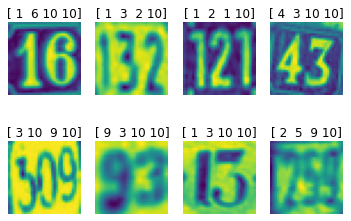

In [31]:
#example of train images
items = random.sample(range(train_dataset.shape[0]), 8)
for i, item in enumerate(items):
    plt.subplot(2, 4, i + 1)
    plt.axis('off')
    plt.title(train_labels[i][1:5])
    plt.imshow(train_dataset[i, :, :])
plt.savefig('D:/magistratura/magistratura/MO/lab4/output_images/plt.png')
plt.show()

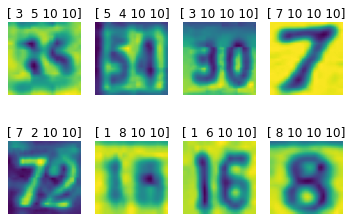

In [32]:
#example of test images
items = random.sample(range(test_dataset.shape[0]), 8)
for i, item in enumerate(items):
    plt.subplot(2, 4, i + 1)
    plt.axis('off')
    plt.title(test_labels[i][1:5])
    plt.imshow(test_dataset[i, :, :])
plt.savefig('D:/magistratura/magistratura/MO/lab4/output_images/test_plt.png')
plt.show()

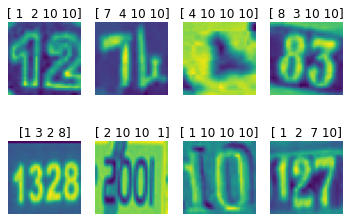

In [33]:
#example of validation images
items = random.sample(range(valid_dataset.shape[0]), 8)
for i, item in enumerate(items):
    plt.subplot(2, 4, i + 1)
    plt.axis('off')
    plt.title(valid_labels[i][1:5])
    plt.imshow(valid_dataset[i, :, :])
plt.savefig('D:/magistratura/magistratura/MO/lab4/output_images/valid_plt.png')
plt.show()

In [34]:
#save all information to pickle file
pickle_file = 'D:/magistratura/magistratura/MO/lab4/SVHN_multi_crop_normalized_32.pickle'
try:
    f = open(pickle_file, 'wb')
    save = {
        'train_dataset': train_dataset,
        'train_labels': train_labels,
        'valid_dataset': valid_dataset,
        'valid_labels': valid_labels,
        'test_dataset': test_dataset,
        'test_labels': test_labels,
    }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
    print("Done")
except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)
    raise

Done
